# SK5009 Kecerdasan Buatan Lanjut
## Tugas 2: Analisis Korelasi dan PCA
Nama: Habiburrohman <br>
NIM: 20925010

##  Library Preparation

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [127]:
df = pd.read_csv('penguins_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              325 non-null    object 
 1   Island               325 non-null    object 
 2   Clutch Completion    325 non-null    object 
 3   Date Egg             325 non-null    object 
 4   Culmen Length (mm)   325 non-null    float64
 5   Culmen Depth (mm)    325 non-null    float64
 6   Flipper Length (mm)  325 non-null    float64
 7   Body Mass (g)        325 non-null    float64
 8   Sex                  325 non-null    object 
 9   Delta 15 N (o/oo)    325 non-null    float64
 10  Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), object(5)
memory usage: 28.1+ KB


In [128]:
df.head(3)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


## Descriptive Statistics

In [129]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


In [130]:
df.describe(include='object')

,Species,Island,Clutch Completion,Date Egg,Sex
count,325,325,325,325,325
unique,3,3,2,50,3
top,Adelie Penguin (Pygoscelis adeliae),Biscoe,Yes,11/27/07,FEMALE
freq,139,163,291,18,163


In [131]:
species_dict = {'Adelie Penguin (Pygoscelis adeliae)': 'Adelie', 
                'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap', 
                'Gentoo penguin (Pygoscelis papua)': 'Gentoo'}

df['Species'] = df['Species'].replace(species_dict)
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [132]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

In [133]:
for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x.lower())
    
df

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,adelie,torgersen,yes,11/11/07,39.5,17.4,186.0,3800.0,female,8.94956,-24.69454
1,adelie,torgersen,yes,11/16/07,40.3,18.0,195.0,3250.0,female,8.36821,-25.33302
2,adelie,torgersen,yes,11/16/07,36.7,19.3,193.0,3450.0,female,8.76651,-25.32426
3,adelie,torgersen,yes,11/16/07,39.3,20.6,190.0,3650.0,male,8.66496,-25.29805
4,adelie,torgersen,no,11/15/07,38.9,17.8,181.0,3625.0,female,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...
320,gentoo,biscoe,no,12/1/09,47.2,13.7,214.0,4925.0,female,7.99184,-26.20538
321,gentoo,biscoe,yes,11/22/09,46.8,14.3,215.0,4850.0,female,8.41151,-26.13832
322,gentoo,biscoe,yes,11/22/09,50.4,15.7,222.0,5750.0,male,8.30166,-26.04117
323,gentoo,biscoe,yes,11/22/09,45.2,14.8,212.0,5200.0,female,8.24246,-26.11969


## Categorical Feature Encoding

### Target

In [134]:
df['Species'].value_counts()

Species
adelie       139
gentoo       119
chinstrap     67
Name: count, dtype: int64

In [135]:
species = ['adelie', 'chinstrap', 'gentoo']

def encode_category(x, order):
    return order.index(x)

# df['Species'] = df['Species'].apply(lambda x: encode_category(x, species))

### Non-Target

In [136]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Species']
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

## Feature Selection

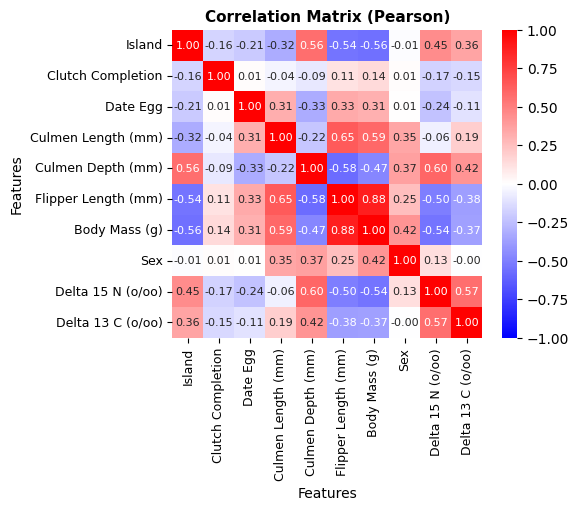

In [140]:
plt.figure(figsize=(5, 4))
ax = sns.heatmap(df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt='.2f', annot_kws={'fontsize': 8})
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize': 9})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize': 9})
plt.title('Correlation Matrix (Pearson)', fontweight='bold', fontsize='11')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.show()

In [ ]:
# p = sns.pairplot(df, kind='scatter', diag_kind='kde', corner=False, hue='Species', palette='autumn', 
#              plot_kws={}, 
#              diag_kws={'color': 'blue'})

# p.fig.suptitle('Pairplot of Numerical Features', fontsize=12, fontweight='bold')
# for ax in p.axes.flat:
#     ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
#     ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')

# plt.tight_layout()
# plt.show()

## Two Features SVM

In [ ]:
X = df[['Flipper Length (mm)', 'Culmen Length (mm)']].to_numpy()
y = df['Species']
y_encoded = y.apply(lambda x: encode_category(x, species))

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, stratify=y, random_state=89)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val, random_state=89)

# Train the Multiclass Linear SVM (OvO strategy is default)
model = SVC(kernel='linear', C=1, decision_function_shape='ovr') 
model.fit(X_train, y_train)

models = {
    'a': SVC(kernel='linear', C=1e-4, decision_function_shape='ovr'), 
    'b': SVC(kernel='linear', C=1e-3, decision_function_shape='ovr'), 
    'c': SVC(kernel='linear', C=1e-2, decision_function_shape='ovr'),
    'd': SVC(kernel='linear', C=1e-1, decision_function_shape='ovr'), 
    'e': SVC(kernel='linear', C=1e0, decision_function_shape='ovr'), 
    'f': SVC(kernel='linear', C=1e1, decision_function_shape='ovr'), 
    'g': SVC(kernel='linear', C=1e2, decision_function_shape='ovr') 
}

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=89)

scoring = {'Accuracy': make_scorer(accuracy_score)}
for i, target in enumerate(species):
    scoring[f'Precision_{target}'] = make_scorer(precision_score, average=None, labels=[target])
    scoring[f'Recall_{target}'] = make_scorer(recall_score, average=None, labels=[target])
    scoring[f'F1_{target}'] = make_scorer(f1_score, average=None, labels=[target])

for i, avg_mode in enumerate(['micro', 'macro', 'weighted']):
    scoring[f'Precision_{avg_mode}'] = make_scorer(precision_score, average=avg_mode)
    scoring[f'Recall_{avg_mode}'] = make_scorer(recall_score, average=avg_mode)
    scoring[f'F1_{avg_mode}'] = make_scorer(f1_score, average=avg_mode)

scoring

{'Accuracy': make_scorer(accuracy_score, response_method='predict'),
 'Precision_adelie': make_scorer(precision_score, response_method='predict', average=None, labels=['adelie']),
 'Recall_adelie': make_scorer(recall_score, response_method='predict', average=None, labels=['adelie']),
 'F1_adelie': make_scorer(f1_score, response_method='predict', average=None, labels=['adelie']),
 'Precision_chinstrap': make_scorer(precision_score, response_method='predict', average=None, labels=['chinstrap']),
 'Recall_chinstrap': make_scorer(recall_score, response_method='predict', average=None, labels=['chinstrap']),
 'F1_chinstrap': make_scorer(f1_score, response_method='predict', average=None, labels=['chinstrap']),
 'Precision_gentoo': make_scorer(precision_score, response_method='predict', average=None, labels=['gentoo']),
 'Recall_gentoo': make_scorer(recall_score, response_method='predict', average=None, labels=['gentoo']),
 'F1_gentoo': make_scorer(f1_score, response_method='predict', average=

In [ ]:
all_metrics_val = {}
for name, model in models.items():
    res = pd.DataFrame(cross_validate(model, X_train, y_train, cv=skf, scoring=scoring))
    res.to_csv(f'{name}_base.csv')
    all_metrics_val[name] = res

all_metrics_val['a']

,fit_time,score_time,test_Accuracy,test_Precision_adelie,test_Recall_adelie,test_F1_adelie,test_Precision_chinstrap,test_Recall_chinstrap,test_F1_chinstrap,test_Precision_gentoo,...,test_F1_gentoo,test_Precision_micro,test_Recall_micro,test_F1_micro,test_Precision_macro,test_Recall_macro,test_F1_macro,test_Precision_weighted,test_Recall_weighted,test_F1_weighted
0,0.004351,0.214617,0.885965,0.952381,0.833333,0.888889,0.730769,0.791667,0.760000,0.913043,...,0.954545,0.885965,0.885965,0.885965,0.865398,0.875000,0.867811,0.891233,0.885965,0.885944
1,0.008507,0.271238,0.946903,0.940000,0.959184,0.949495,0.909091,0.869565,0.888889,0.975610,...,0.975610,0.946903,0.946903,0.946903,0.941567,0.934786,0.937998,0.946629,0.946903,0.946634


In [169]:
avg_metrics_val = pd.DataFrame()
for name, metrics in all_metrics_val.items():
    avg_metrics_val[name] = metrics.mean()

avg_metrics_val.to_csv('avg_base.csv')
all_metrics_val['d']

,fit_time,score_time,test_Accuracy,test_Precision_adelie,test_Recall_adelie,test_F1_adelie,test_Precision_chinstrap,test_Recall_chinstrap,test_F1_chinstrap,test_Precision_gentoo,...,test_F1_gentoo,test_Precision_micro,test_Recall_micro,test_F1_micro,test_Precision_macro,test_Recall_macro,test_F1_macro,test_Precision_weighted,test_Recall_weighted,test_F1_weighted
0,0.001565,0.058336,0.912281,0.954545,0.875000,0.913043,0.800000,0.833333,0.816327,0.933333,...,0.965517,0.912281,0.912281,0.912281,0.895960,0.902778,0.898296,0.914195,0.912281,0.912014
1,0.001580,0.103533,0.946903,0.940000,0.959184,0.949495,0.909091,0.869565,0.888889,0.975610,...,0.975610,0.946903,0.946903,0.946903,0.941567,0.934786,0.937998,0.946629,0.946903,0.946634


In [ ]:
# 1. Define plotting bounds based on the data range
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 2. Create a dense meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# 3. Predict the class for every point in the mesh
# This is what generates the decision surface
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plotting ---
plt.figure(figsize=(10, 7))

# 1. Plot the Decision Surface (Multiclass Regions)
# The boundaries visible here are the three combined hyperplanes
plt.contourf(xx, yy, Z, alpha=0.3, cmap='jet')

# 2. Plot the Original Data Points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=40, edgecolors='k')

# 3. Plot the Support Vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

# --- Add Margin Visualizations (The New Part) ---

W = model.coef_
B = model.intercept_
x0_range = np.linspace(x_min, x_max, 200)
for i in range(W.shape[0]):
    w = W[i]
    b = B[i]
    
    # Check if w[1] is near zero to prevent division by zero
    if np.abs(w[1]) < 1e-10:
        continue 
    
    # Hyperplane: x1 = -w0/w1 * x0 - b/w1 (where w.x + b = 0)
    decision_boundary = -w[0] / w[1] * x0_range - b / w[1]
    
    # Margin Lines: w.x + b = 1 and w.x + b = -1
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # Plot the margins
    plt.plot(x0_range, gutter_up, "k--", linewidth=1.0, alpha=0.7)
    plt.plot(x0_range, gutter_down, "k--", linewidth=1.0, alpha=0.7)
    # Plot the hyperplane (center line)
    plt.plot(x0_range, decision_boundary, "k-", linewidth=1.5, alpha=0.8, zorder=5)

# 4. Add labels and title
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Linear Multiclass SVM Decision Boundaries (One-vs-One)')
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend for the species and support vectors
legend1 = plt.legend(*scatter.legend_elements(), 
                     title="Species", 
                     loc="lower right", 
                     bbox_to_anchor=(1.25, 0))
plt.gca().add_artist(legend1)
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0.2))

plt.xlim(x_min, x_max)  
plt.ylim(y_min, y_max)
plt.show()

### Three Features SVM

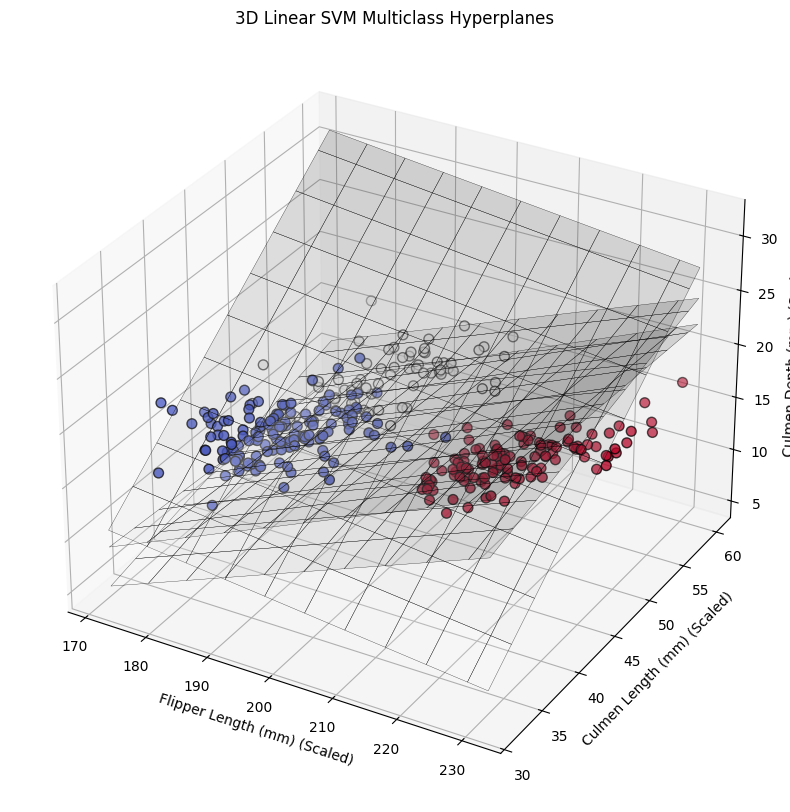

In [61]:
cols = ['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)']
X = df[cols].to_numpy()
y = df['Species']
y_encoded = y.apply(lambda x: encode_category(x, species))

# Feature indices for plotting
x0_idx, x1_idx, x2_idx = 0, 1, 2

# Train the Multiclass Linear SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X, y_encoded)


# --- 3D Visualization Logic ---

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot the Data Points
scatter = ax.scatter(X[:, x0_idx], X[:, x1_idx], X[:, x2_idx],
                     c=y_encoded, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Data Points')

# 2. Define the plotting range for the hyperplanes
# Use a 2D grid (xx, yy) for the first two features, which are the x and y axes in 3D
x_min, x_max = X[:, x0_idx].min() - 0.5, X[:, x0_idx].max() + 0.5
y_min, y_max = X[:, x1_idx].min() - 0.5, X[:, x1_idx].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20),
                     np.linspace(y_min, y_max, 20))

# 3. Iterate and Plot the Three Hyperplanes
W = model.coef_ # (3, 3) matrix of weights
B = model.intercept_ # (3,) vector of biases

for i in range(W.shape[0]):
    w = W[i]
    b = B[i]
    
    # Solve the hyperplane equation for x2 (the z-axis)
    # w0*x0 + w1*x1 + w2*x2 + b = 0  =>  x2 = (-w0/w2)*x0 + (-w1/w2)*x1 - b/w2
    if np.abs(w[x2_idx]) < 1e-6: # Skip if coefficient is near zero to avoid division by zero
        continue
        
    # Calculate the z-coordinates (x2) for the hyperplane
    zz = (-w[x0_idx] * xx - w[x1_idx] * yy - b) / w[x2_idx]
    
    # Plot the plane (The decision boundary for one binary classifier)
    ax.plot_surface(xx, yy, zz, alpha=0.15, cmap=plt.cm.gray_r, rcount=10, ccount=10, edgecolors='k', linewidth=0.2)

# 4. Final Plot Setup
ax.set_xlabel(cols[x0_idx] + ' (Scaled)')
ax.set_ylabel(cols[x1_idx] + ' (Scaled)')
ax.set_zlabel(cols[x2_idx] + ' (Scaled)')
ax.set_title('3D Linear SVM Multiclass Hyperplanes')
ax.grid(True)

plt.show()

In [ ]:
X = df[['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)']].to_numpy()
y = df['Species']
y_encoded = y.apply(lambda x: encode_category(x, species))

# 3. Train SVM on all three features
model = SVC(kernel='linear', C=1.0)
model.fit(X, y_encoded)

# --- Visualization Logic ---

# We only use the first two scaled features for plotting bounds
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

# Create meshgrid using only the first two dimensions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

slice_feature_index = 2
median_depth = np.median(X[:, slice_feature_index])
# Prepare the mesh for prediction: Append the median depth value to every point
# xx.ravel() and yy.ravel() are the first two dimensions. We add the third dimension (median_depth)
median_slice = np.full(xx.ravel().shape, median_depth)
X_mesh_sliced = np.c_[xx.ravel(), yy.ravel(), median_slice]


# Predict the class for every point in the sliced mesh
Z = model.predict(X_mesh_sliced)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))

# Plot Decision Surface
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot Data Points (using only the first two scaled features)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, s=40, edgecolors='k')

# Plot Support Vectors (using only the first two scaled features)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='k', linewidth=2.0, label='Support Vectors')

# Add labels
plt.xlabel('Culmen Length (Standardized)')
plt.ylabel('Flipper Length (Standardized)')
plt.title(f'Linear SVM Decision Boundary (Sliced at Median Culmen Depth)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [41]:
model.coef_, model.intercept_, model.support_vectors_

(array([[ 0.09291823, -0.67947985],
        [-0.34395183, -0.45969676],
        [-0.29281755,  0.50523446]]),
 array([11.95935237, 90.40202045, 36.139663  ]),
 array([[194. ,  46. ],
        [180. ,  42.2],
        [196. ,  44.1],
        [191. ,  42.3],
        [197. ,  45.8],
        [195. ,  42.8],
        [205. ,  41.1],
        [208. ,  40.8],
        [192. ,  43.2],
        [197. ,  43.2],
        [191. ,  45.6],
        [176. ,  40.2],
        [210. ,  44.1],
        [197. ,  43.1],
        [198. ,  45.2],
        [181. ,  42.4],
        [187. ,  43.2],
        [187. ,  40.9],
        [187. ,  42.5],
        [210. ,  52. ],
        [210. ,  49. ],
        [196. ,  45.5],
        [212. ,  49. ],
        [187. ,  42.5],
        [194. ,  45.6],
        [195. ,  45.7],
        [202. ,  43.5],
        [210. ,  50.8],
        [210. ,  48.7],
        [210. ,  48.2],
        [208. ,  48.7],
        [208. ,  42.7],
        [208. ,  43.2],
        [203. ,  48.4],
        [210. ,  41.7],
 

## SVM

In [ ]:
# Analisis SVM
# Bangun model supaya akurasinya bagus
# Mencari hyperparameter terbaik
# 1 tim memilih 1 dataset berlabel
# Train:Test:Val = 70:20:10 (Label di subset val dihapus dulu, dibandingkan dengan prediksinya)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_model", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_model.fit(X, y)

poly100_kernel_svm_model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_model", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_model.fit(X, y)

NameError: name 'X' is not defined

## Principal Component Analysis (PCA)

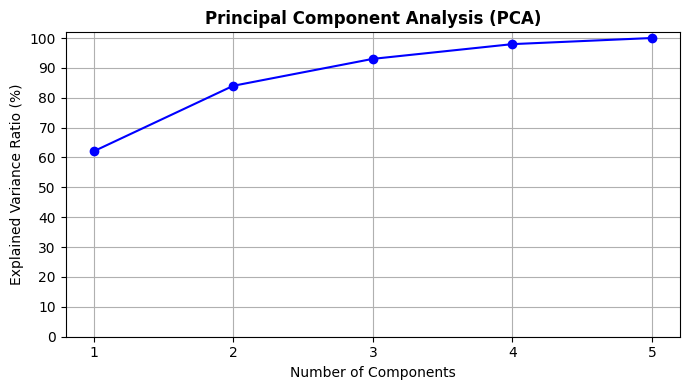

In [19]:
standard_scaler = StandardScaler()
# numeric_cols = selected_features
# numeric_cols = [col for col in selected_features if df[col].dtype != 'object']
numeric_cols = ['Flipper Length (mm)', 'Body Mass (g)', 'Culmen Depth (mm)', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']
df_numeric = df[numeric_cols].copy()
scaled_data = standard_scaler.fit_transform(df_numeric)
df_numeric = pd.DataFrame(scaled_data, columns=df_numeric.columns, index=df_numeric.index)

var_ratio = []
n_components = range(1, len(df_numeric.columns) + 1)
for i in n_components:
    pca = PCA(n_components=i)
    pca.fit(df_numeric)
    var_ratio.append(np.sum(pca.explained_variance_ratio_) * 100)

plt.figure(figsize=(7, 4))
plt.plot(n_components, var_ratio, 'bo-')
plt.title('Principal Component Analysis (PCA)', fontweight='bold')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.xticks(ticks=n_components)
plt.yticks(ticks=range(0, 105, 10))
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(df_numeric)

pca_data = pca.transform(df_numeric)
pca_cols = [f'PCA{i}' for i in range(1, pca_data.shape[1] + 1)]
df_numeric_pca = pd.DataFrame(pca_data, columns=pca_cols)
df_numeric_pca.reset_index(drop=True)
df_numeric_pca

,PCA1,PCA2,PCA3
0,-1.357895,-0.516449,-0.133869
1,-1.029732,-0.900629,0.285722
2,-1.769119,-0.617291,0.736320
3,-1.783649,-0.128994,1.304330
4,-1.950949,-0.340600,-0.241448
...,...,...,...
320,2.387771,-0.875277,-0.508355
321,1.931339,-0.351720,-0.608991
322,2.797158,0.513233,0.352682
323,1.948150,-0.585474,-0.054135


In [21]:
df_pca = pd.concat([df_numeric_pca, df[['Island', 'Species']]], axis=1)
df_pca

,PCA1,PCA2,PCA3,Island,Species
0,-1.357895,-0.516449,-0.133869,2,0
1,-1.029732,-0.900629,0.285722,2,0
2,-1.769119,-0.617291,0.736320,2,0
3,-1.783649,-0.128994,1.304330,2,0
4,-1.950949,-0.340600,-0.241448,2,0
...,...,...,...,...,...
320,2.387771,-0.875277,-0.508355,0,2
321,1.931339,-0.351720,-0.608991,0,2
322,2.797158,0.513233,0.352682,0,2
323,1.948150,-0.585474,-0.054135,0,2


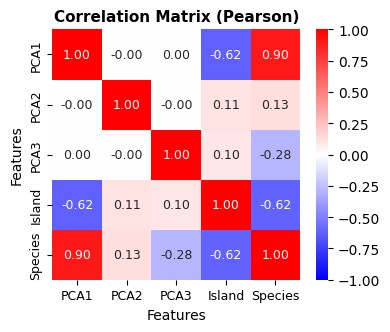

In [22]:
plt.figure(figsize=(4, 3.25))
ax = sns.heatmap(df_pca.corr(method='pearson', numeric_only=False), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt='.2f', annot_kws={'fontsize': 9})
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize': 9})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize': 9})
plt.title('Correlation Matrix (Pearson)', fontweight='bold', fontsize=11)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.show()